# Live Twitter Sentiments for Cryptocurrencies

Plot the evolution in time of the tweets sentiment for a cryptocurrency. We will use the *tweepy*'s streaming to see the live evolution of the Twitter sentiments for the cryptocurrencies.

* *Inputs*: currency keywords to seach in Twitter, number of tweets to analyse the sentiement, plot update interval in seconds (default = 1.0 seconds).
* *Output*: Plot with sentiment analysis and the mean in time for a specific cryptocurrency.
* *Note*: The free Twitter plan lets you download *100 Tweets per search*, and you can search Tweets from the previous seven days. *Please check the limits of getting tweets per day or month before to use this script!*

### Requirements
* *Language*: Python 3.*
* *Dependencies*: tweepy = retrieve tweets using APIs; json = handling the API results, textblob = text operations and sentiment analysis, re = text processing, matplotlib = plots, numpy = numerical calculations, IPython = interactive plots into notebooks
* *Other tools*: Textblog Corpora for text processing: *python -m textblob.download_corpora*

## How to use
Complete your twitter API credential and your crypto keywords, number of tweets and run the entire notebook.

## Step 1: Import the python dependencies

In [1]:
import time, json, re
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener 
from textblob import TextBlob
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import clear_output
%matplotlib inline

## Step 2: Define your data

You need to define the keywords, number of tweets, the update interval, and your twitter API keys. Your can define the key here or read them from a JSON file.

In [2]:
# YOUR preference (to complete)
keywords = ["Bitcoin", 'BTC']  # a set of keywords for a crypto
noTweets = 10                  # number of tweets/connections
secUpdate = 1.0                # update interval in seconds 

# YOUR Twitter API information (to complete)
# if you have a local file with your info, ommit these lines
CONSUMER_KEY    = 'YOUR DATA'
CONSUMER_SECRET = 'YOUR DATA'
ACCESS_TOKEN    = 'YOUR DATA'
ACCESS_SECRET   = 'YOUR DATA'

# Setting a JSON of your credentials (to complete)
creds = {"CONSUMER_KEY": CONSUMER_KEY, "CONSUMER_SECRET": CONSUMER_SECRET,
         "ACCESS_TOKEN": ACCESS_TOKEN, "ACCESS_SECRET": ACCESS_SECRET}

# If you didnt define above, load credentials from json file
# (overwrite creds with data from file if available)
try:
    print('-> Reading Twitter API credentials from file ... ')
    with open("twitter_credentials.json", "r") as file:
        creds = json.load(file)
    print('Done!')
except:
    print('! There is no twitter API credential file! Using the information you defined above!')

-> Reading Twitter API credentials from file ... 
Done!


## Step 3: Define a custom class for Twitter streaming

We will use some variables as globals in order to input parameters from the main code (currency keywords to seach in Twitter, number of tweets to analyse the sentiement, plot refresh time) and to fill list with tweets sentiment, times of the sentiment analysis and means of the sentiments at a specific time. These list will be used to interactivelly plot the evolution of the sentiment and the mean of sentiments.

In [7]:
class listener(StreamListener):
    def on_data(self,data):
        global initime     # to calculate the time of analysis
        global inidatetime # to print the initial datetime
        global count       # counting the tweets
        global t           # list with the time of sentiment analysis
        global sent        # list with sentiments at moments t
        global sentMeans   # list of sentiment means at different time
        
        global keywords    # external - list with keywords for a crypto
        global noTweets    # external - number of tweets to get with your twitter API 
        global secUpdate   # external - number of seconds to update the plot
        
        # update the list for analysis time
        currTime = int(time.time()-initime)
        t.append(currTime)
        
        # get the tweet data
        all_data=json.loads(data)
        # encode to unicode for different types of characters
        tweet=all_data["text"].encode("utf-8")
        # remove strange characters from the tweet
        tweet=" ".join(re.findall("[a-zA-Z]+", str(tweet)))
        # strip the spaces from the tweet
        blob=TextBlob(tweet.strip())
        
        # count the tweets
        count=count+1
        
        # update the list for sentiments and the means at different time 
        sent.append(blob.sentiment.polarity)
        sentMeans.append(np.mean(sent))
        
        # Plotting sentiment analysis in time for a cryptocurrency
        # clear the plot
        clear_output(wait=True)
        # set axis, labels
        plt.axis([ 0, noTweets+int(noTweets/2), -1,1])
        plt.xlabel('Time')
        plt.ylabel('Twitter sentiment')
        # plot sentiments and means in time
        plt.plot(t,sent, t,sentMeans)
        # print the current mean of sentiments
        plt.text(0, 1.2, 'From: '+str(inidatetime)+' To: '+str(time.ctime()))
        plt.text(0, 1.1, 'Sentiment Mean for '+str(keywords)+': '+str(np.mean(sent)))
        
        # add legend
        plt.legend(['Sentiment', 'Sentiment Mean'],loc='center left', bbox_to_anchor=(1, 0.5))
        # plotting
        plt.show()
        # wait for update
        plt.pause(secUpdate) # wait 1 sec!
        
        # if we have the number of tweets, end the script
        if count==noTweets:
            return False
        else:
            return True
        
    def on_error(self,status):
        print(status)

## Step 4: Run the Twitter stream for sentiment analysis

Initialize all the variables and use the tweets stream for sentiment analysis plotting:

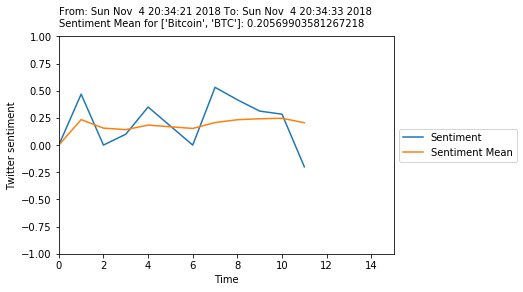

In [8]:
# Define external variables to be used inside the streaming class
t = [0]              # list with time
sent = [0]           # list with tweets sentiment in time
sentMeans = [0]      # list with means of sentiment in time
count=0              # curent number of tweet
initime=time.time()  # to calculate the time
inidatetime = time.ctime() # initial date time in readable format

# setup the twitter screaming
auth=OAuthHandler(creds['CONSUMER_KEY'],creds['CONSUMER_SECRET'])
auth.set_access_token(creds['ACCESS_TOKEN'],creds['ACCESS_SECRET'])

# start the stream with tweets using your keyworks
twitterStream = Stream(auth, listener(count))
twitterStream.filter(track=keywords)

### Hint
You can use this notebook for any twitter search, not limited to the cryptocurrencies!

Hf!

2018@muntisa